## Image Analysis

In [18]:
import imageio
import matplotlib.pyplot as plt

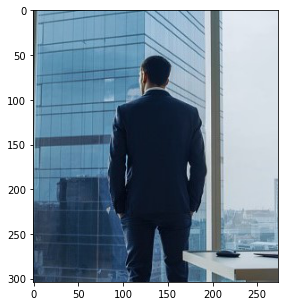

In [25]:
%matplotlib inline
pic = imageio.imread('pic7.jpg')
plt.figure(figsize = (5,5))
plt.imshow(pic)

In [20]:
print('Type of the image : ' , type(pic)) 
print('Shape of the image : {}'.format(pic.shape)) 
print('Image Hight {}'.format(pic.shape[0])) 
print('Image Width {}'.format(pic.shape[1])) 
print('Dimension of Image {}'.format(pic.ndim))

Type of the image :  <class 'imageio.core.util.Array'>
Shape of the image : (304, 274, 3)
Image Hight 304
Image Width 274
Dimension of Image 3


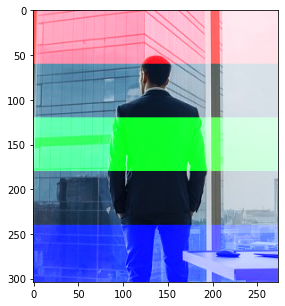

In [4]:
pic2 = pic.copy()
l=pic2.shape[0]//5
pic2[:l,:,0]=255
pic2[2*l:3*l,:,1]=255
pic2[4*l:,:,2]=255
plt.figure(figsize = (5,5))
plt.imshow(pic2)

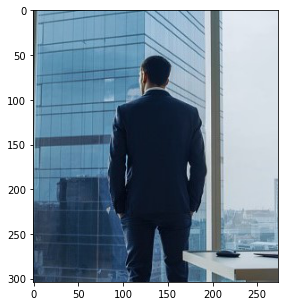

In [5]:
plt.figure(figsize = (5,5))
plt.imshow(pic)

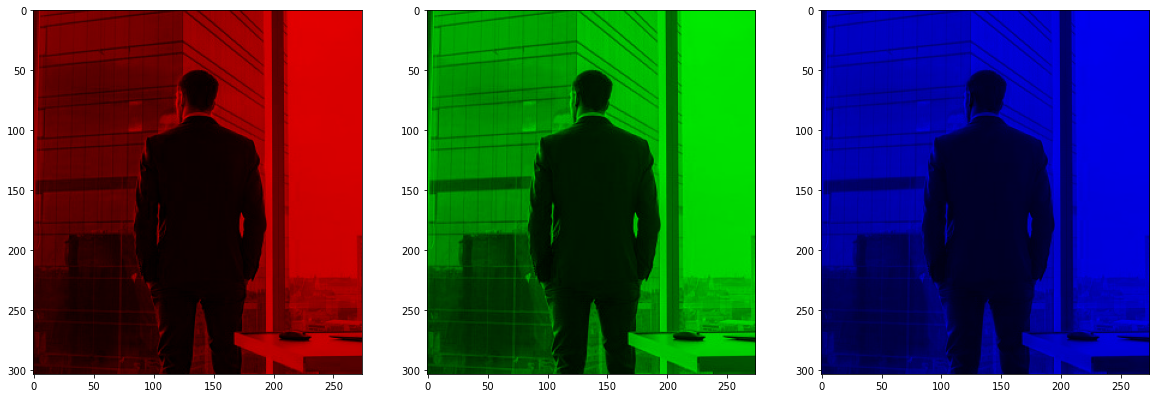

In [6]:
import numpy as np
plt.figure(figsize=(20,30))
for i in range(3):
    split_image = np.zeros(pic.shape,dtype ='uint8')
    plt.subplot(1,3,i+1)
    split_image[:,:,i]=pic[:,:,i]
    plt.imshow(split_image)    

# Image Encryption

In [7]:
IV = [45, 233]
M1=np.array([227, 209, 81, 239, 47, 183, 61, 214, 0, 152, 64, 237, 117, 29, 6, 148, 
    222, 20, 68, 195, 42, 115, 25, 88, 186, 184, 95, 35, 178, 37, 149, 192,
    40, 76, 198, 103, 225, 17, 104, 232, 118, 210, 31, 75, 151, 247, 218, 93,
    22, 52, 18, 2, 159, 120, 109, 166, 194, 155, 46, 89, 112, 100, 83, 121,
    45, 11, 203, 129, 132, 87, 65, 9, 24, 187, 217, 224, 144, 226, 153, 78,
    167, 253, 179, 213, 91, 174, 200, 158, 196, 208, 82, 80, 86, 215, 128, 108,
    160, 250, 96, 48, 122, 190, 185, 223, 51, 219, 137, 202, 228, 176, 236, 136,
    110, 207, 246, 7, 5, 79, 41, 165, 113, 38, 123, 59, 70, 201, 114, 26,
    131, 124, 53, 249, 234, 171, 21, 240, 233, 145, 44, 92, 50, 197, 133, 43,
    67, 156, 177, 254, 23, 107, 102, 33, 139, 28, 248, 243, 180, 15, 125, 221,
    126, 169, 146, 62, 111, 163, 212, 36, 73, 170, 4, 229, 66, 130, 188, 39,
    143, 10, 244, 12, 54, 162, 13, 14, 94, 175, 56, 216, 77, 231, 49, 72,
    116, 147, 251, 119, 173, 255, 164, 168, 8, 142, 154, 19, 99, 191, 134, 230,
    32, 211, 252, 193, 150, 34, 98, 97, 58, 220, 55, 199, 69, 105, 27, 71,
    181, 101, 242, 90, 60, 85, 141, 3, 172, 235, 157, 241, 245, 135, 63, 140,
    206, 30, 182, 238, 205, 74, 161, 106, 189, 204, 1, 16, 127, 84, 57, 138],dtype = 'uint8')
M1=M1.reshape(16,16)

In [8]:
per=[8, 15, 2, 16, 10, 7, 12, 3, 11, 14, 6, 4, 9, 5, 13, 1]
M2 = np.zeros((16,16),dtype = 'uint8')
for i in range(16):
    M2[:,i]=M1[:,per[i]-1]    
#M=np.concatenate([M1, M2], axis = 1)  

## Step1: Encryption using Modified Two Squre Method

## Encryption

In [9]:
def tsq(z):
    t1=np.where(M1==z[0])
    t2=np.where(M2==z[1])
    t1 =(t1[0][0],t1[1][0])
    t2 =(t2[0][0],t2[1][0])
    if(t1[0]==t2[0]):
        z= [M1[t1[0] ,(t1[1]+1)%16], M2[t2[0],(t2[1]+1)%16]]
    else:
        z= [M2[t1[0], t2[1]], M1[t2[0], t1[1]]]
    return z
L=tsq([16,25])
L

[161, 35]

In [10]:
def dtsq(z):                       
    t1=np.where(M1==z[0])
    t2=np.where(M2==z[1])
    t1 =(t1[0][0],t1[1][0])
    t2 =(t2[0][0],t2[1][0])
    if(t1[0]==t2[0]):
        z= [M1[t1[0] ,(t1[1]-1)%16], M2[t2[0],(t2[1]-1)%16]]
    else:
        z= [M2[t1[0], t2[1]], M1[t2[0], t1[1]]]
    return z
dtsq(L)

[16, 25]

In [11]:
def enp(z):
    global iv
    z = [z[0] ^iv[0], z[1] ^iv[1]]
    z=tsq(z)
    iv = z
    return z

In [12]:
def denp(z):
    global iv
    z1=dtsq(z)
    z1= [z1[0] ^iv[0], z1[1] ^iv[1]]
    iv =z
    return z1

In [13]:
def encrypt(picr):
    pic=picr.reshape(np.size(picr)//2,2)
    global iv
    iv=IV
    map_obj = map(enp,pic)
    pic2 = np.array(list(map_obj))
    pic = pic2.reshape(picr.shape)
    return pic

In [14]:
def decrypt(picr):
    pic=picr.reshape(np.size(picr)//2,2)
    global iv
    iv=IV
    map_obj = map(denp,pic)
    pic2 = np.array(list(map_obj))
    pic = pic2.reshape(picr.shape)
    return pic

In [15]:
ci1= np.empty(pic.shape, dtype = 'uint8')
for i in range(3):
    picr = pic[:,:,i]
    ci1[:,:,i]= encrypt(picr)

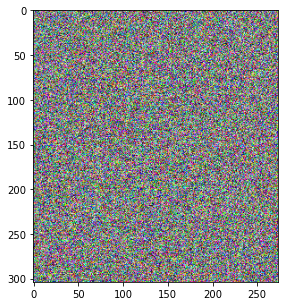

In [16]:
plt.figure(figsize = (5,5))
plt.imshow(ci1)

## Decryption

In [17]:
pl= np.empty(ci.shape, dtype = 'uint8')
for i in range(3):
    picr = ci1[:,:,i]
    pl[:,:,i]= decrypt(picr)

NameError: name 'ci' is not defined

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(pl)

## Step 2: Encryption Using Arnold Map

## Encryption

In [ ]:
A = np.array([[1, 1],[1, 2]])
a = [20,5,27,7]
b = [6,36,4,30]

In [ ]:
def ar(pic,x):
    n = pic.shape[0]
    pic1 = np.empty(pic.shape, dtype='uint8')
    global A
    for i in range(n):
        for j in range(n):
            s=[i, j]
            for k in range(x):
                s=np.dot(A,s)%n
            pic1[tuple(s)]=pic[i,j]
    return pic1      

In [ ]:
def prd(n):
    global A
    B=A
    i=1
    while(not np.allclose(B,np.eye(2))):
        i+=1
        B=np.dot(B,A)%n
    return(i)
prd(137)

In [ ]:
def dar(pic,x):
    global A
    n = pic.shape[0]
    #x = prd(n)-x
    pic1 = np.empty(pic.shape, dtype='uint8')
    for i in range(n):
        for j in range(n):
            s=[i, j]
            for k in range(x):
                s=np.dot(A,s)%n
            pic1[tuple(s)]=pic[i,j]
    return pic1      

In [ ]:
ci2= np.empty(pic.shape, dtype = 'uint8')
#pic2 = pic.copy()
pic2 = ci1
for i in range(3):
    picr = pic2[:,:,i]
    t= min(picr.shape)
    [m,n]=picr.shape
    s=t//2
    c = 0
    for p in range(2):
        for q in range(2):
            picr[p*s:p*s+s,q*s:q*s+s] = ar(picr[p*s:p*s+s,q*s:q*s+s],a[c])
            c+=1
    c = 0
    for p in range(2):
        for q in range(2):
            picr[m-p*s-s:m-p*s,n-q*s-s:n-q*s] = ar(picr[m-p*s-s:m-p*s,n-q*s-s:n-q*s],b[c])
            c+=1
    ci2[:,:,i] = picr
plt.imshow(ci2)

## Decryption (from Arnold map Encryption)

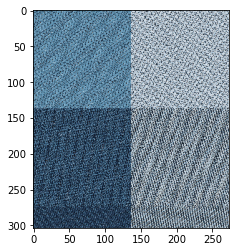

In [110]:
pl1= np.empty(ci.shape, dtype = 'uint8')
for i in range(3):
    picr = ci[:,:,i]
    t= min(picr.shape)
    [m,n]=picr.shape
    s=t//2
    c = 0
    pd = prd(n)
    for p in range(2):
        for q in range(2):
            picr[m-p*s-s:m-p*s,n-q*s-s:n-q*s] = ar(picr[m-p*s-s:m-p*s,n-q*s-s:n-q*s],pd-b[c])
            c+=1
    c = 0
    for p in range(2):
        for q in range(2):
            picr[p*s:p*s+s,q*s:q*s+s] = dar(picr[p*s:p*s+s,q*s:q*s+s],pd-a[c])
            c += 1
    pl1[:,:,i] = picr
plt.imshow(pl1)

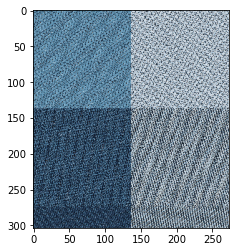

In [111]:
plt.imshow(pl1)

## Decryption (from two square method)

In [112]:
pl2= np.empty(ci.shape, dtype = 'uint8')
for i in range(3):
    picr = pl1[:,:,i]
    pl2[:,:,i]= decrypt(picr)

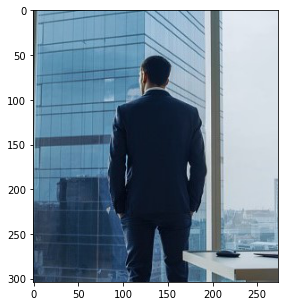

In [113]:
plt.figure(figsize = (5,5))
plt.imshow(pl)